In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load Data
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\ドキュメント\Bangkit\Portofolio\Dataset\archive (3)\Carbon Emission.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [3]:
df.shape

(10000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [5]:
# Count the number of duplicates
duplicate_count = df.duplicated().sum()
print(f'Number of duplicates: {duplicate_count}')

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values
print('Number of missing values in each column:')
print(missing_values)

Number of duplicates: 0
Number of missing values in each column:
Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64


In [6]:
# Fill the missing value in the Vehicle Type column with 'Unknown'
df['Vehicle Type'] = df['Vehicle Type'].fillna('Unknown')

In [7]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values
print('Number of missing values in each column:')
print(missing_values)

Number of missing values in each column:
Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64


In [8]:
# View descriptive statistics
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


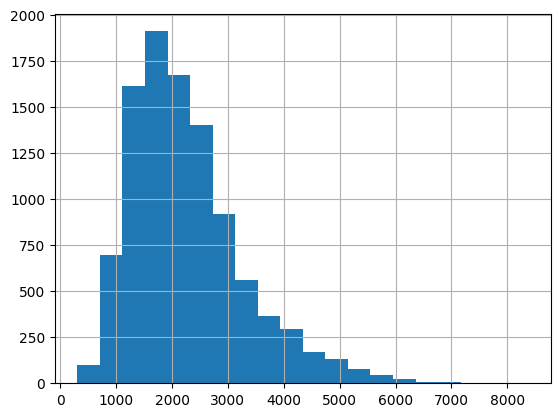

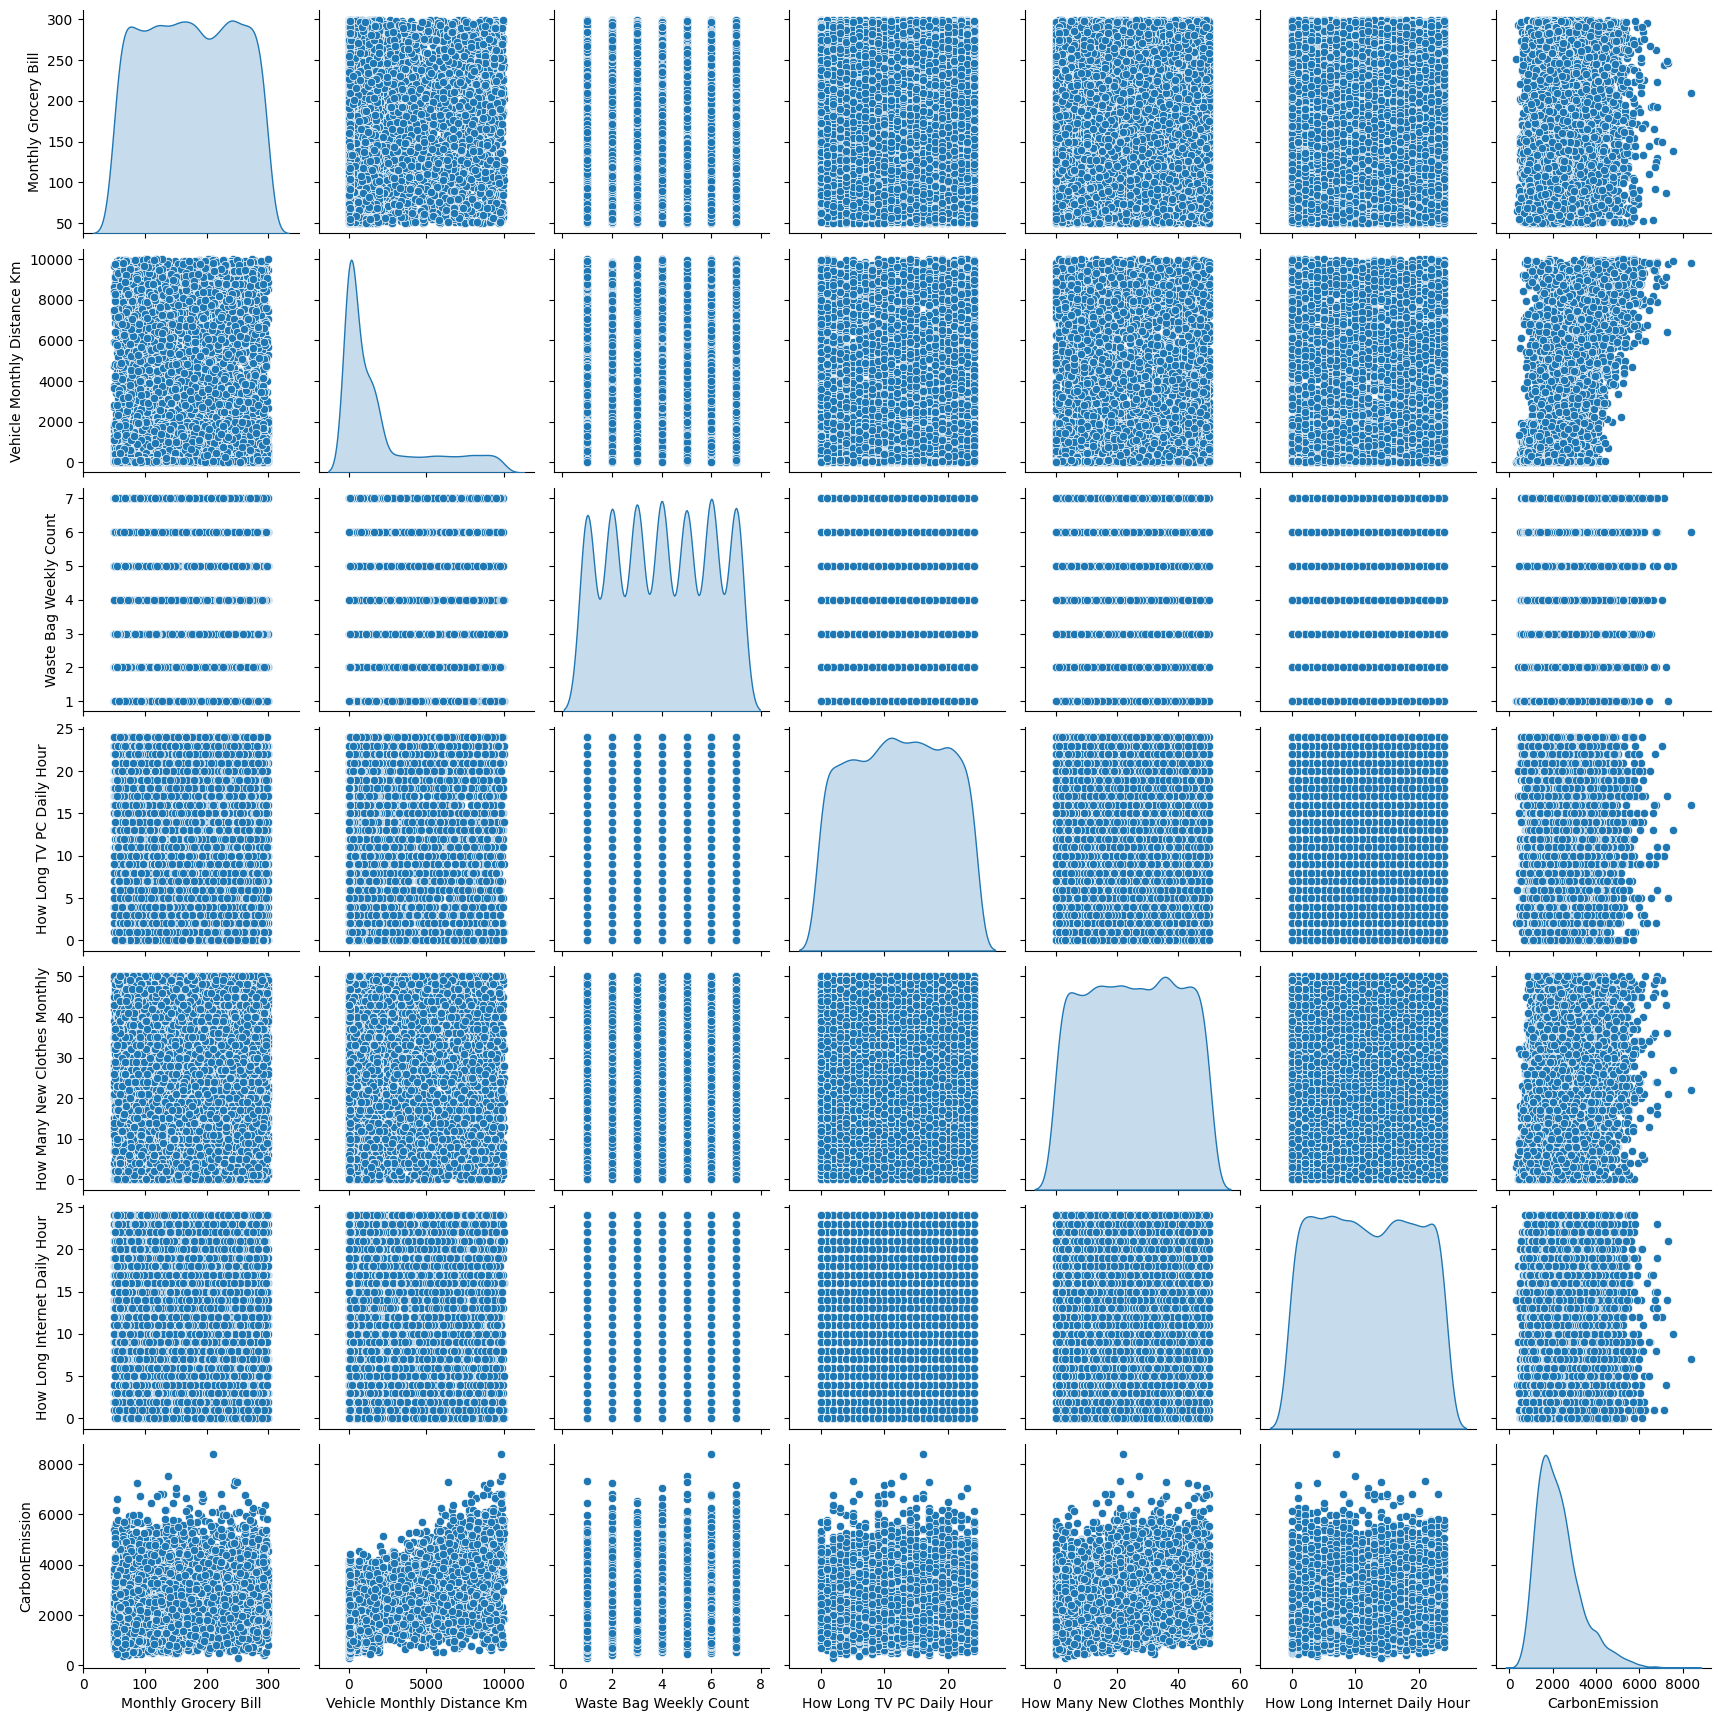

In [9]:
# Visualize the target distribution (CarbonEmission)
df['CarbonEmission'].hist(bins=20) 

# Visualize the relationship between features
sns.pairplot(df, diag_kind='kde') 

In [10]:
categorical_cols = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 
                    'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 
                    'Waste Bag Size', 'Energy efficiency', 'Recycling', 'Cooking_With']

# Using LabelEncoder to encode category variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
# Normalize or standardize numeric features
scaler = StandardScaler()
num_cols = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 
            'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 
            'How Many New Clothes Monthly', 'How Long Internet Daily Hour']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
# Selecting relevant features for carbon emission prediction
X = df.drop(['CarbonEmission'], axis=1) # Features
y = df['CarbonEmission'] # Target

In [13]:
# Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# # Create and train the GradientBoostingRegressor model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 169.07722129893216
Mean Squared Error (MSE): 54317.50037051053
R-squared (R²): 0.9477569826474407


In [19]:
# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200],  # Number of decision tree estimators
    'learning_rate': [0.05, 0.1],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of the tree
}

# Initialize the GradientBoostingRegressor and perform GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# View the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Using the best model from the grid search for prediction
best_gb_model = grid_search.best_estimator_
y_pred_best = best_gb_model.predict(X_test)

# Re-evaluate with the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics
print("\nEvaluation with Best Model:")
print("Mean Absolute Error (MAE):", mae_best)
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R²):", r2_best)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Evaluation with Best Model:
Mean Absolute Error (MAE): 101.28656599736532
Mean Squared Error (MSE): 19479.222224614998
R-squared (R²): 0.9812647243014995


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Perform cross-validation with 5 folds using negative mean squared error as the scoring metric
cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values for interpretation
cv_scores = -cv_scores

# Output the cross-validation results
print("Cross-validation results for MSE (Mean Squared Error):")
print("Mean CV MSE:", cv_scores.mean())
print("Standard Deviation of CV MSE:", cv_scores.std())

# using R-squared
cv_r2_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='r2')

print("\nCross-validation results for R-squared (R²):")
print("Mean CV R²:", cv_r2_scores.mean())
print("Standard Deviation of CV R²:", cv_r2_scores.std())

# using Mean Absolute Error (MAE)
cv_mae_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print("\nCross-validation results for MAE (Mean Absolute Error):")
print("Mean CV MAE:", cv_mae_scores.mean())
print("Standard Deviation of CV MAE:", cv_mae_scores.std())

Cross-validation results for MSE (Mean Squared Error):
Mean CV MSE: 22097.70767302096
Standard Deviation of CV MSE: 1525.1213751619723

Cross-validation results for R-squared (R²):
Mean CV R²: 0.9786224200736054
Standard Deviation of CV R²: 0.001460255963418777

Cross-validation results for MAE (Mean Absolute Error):
Mean CV MAE: 106.75456783866734
Standard Deviation of CV MAE: 1.7563873894134923


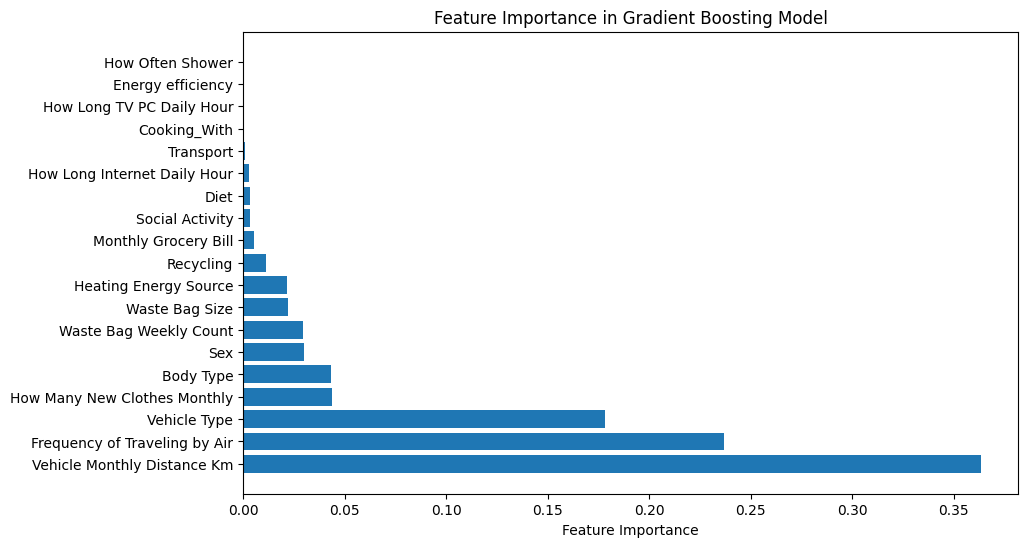

In [22]:
# see which features have the most influence on the prediction

feature_importances = best_gb_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

In [23]:
import joblib

# Save the best model
joblib.dump(best_gb_model, 'best_gb_model.pkl')

# To load the saved model later:
# loaded_model = joblib.load('best_gb_model.pkl')

['best_gb_model.pkl']